# Initialization

In [1]:
import Client
import numpy as np
import utils
client = Client.Client('tcp://192.168.0.129:8878')

20250306_105038
['slm: hamamatsu display 1 / camera: network']


## 2/24 -- Wide spacing 4x10 array

In [33]:
## 1/9/25  1row for calibration
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([4,10], [10,10], 0, [392,352])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[377. 387. 397. 407. 377. 387. 397. 407. 377. 387. 397. 407. 377. 387.
  397. 407. 377. 387. 397. 407. 377. 387. 397. 407. 377. 387. 397. 407.
  377. 387. 397. 407. 377. 387. 397. 407. 377. 387. 397. 407.]
 [397. 397. 397. 397. 387. 387. 387. 387. 377. 377. 377. 377. 367. 367.
  367. 367. 357. 357. 357. 357. 347. 347. 347. 347. 337. 337. 337. 337.
  327. 327. 327. 327. 317. 317. 317. 317. 307. 307. 307. 307.]]
[[-60 -60 -60 -60 -50 -50 -50 -50 -40 -40 -40 -40 -30 -30 -30 -30 -20 -20  -20 -20 -10 -10 -10 -10   0   0   0   0  10  10  10  10  20  20  20  20   30  30  30  30] [  8  18  28  38   8  18  28  38   8  18  28  38   8  18  28  38   8  18   28  38   8  18  28  38   8  18  28  38   8  18  28  38   8  18  28  38    8  18  28  38]]


In [53]:
k_array = andor_to_k(targets)
a = [1.0738,1.0293,0.98643,1.1071,1.0687,1.0726,1.1114,1.1328,1.0091,1.0805,1.1099,1.019,1.0419,1.0554,1.0323,1.0459,0.93924,0.92814,1.0173,0.97189,0.98976,0.99763,1.0414,1.0958,0.96577,0.99215,0.96477,0.96077,0.91234,0.93065,0.94815,0.95155,0.91007,0.95429,0.92918,0.97837,0.9849,0.91878,0.95602,0.93669]
a[20-1] = a[20-1]*1.05
a[24-1] = a[24-1]*0.95
target_amps = np.array(a)
# target_amps[0] = target_amps[0]*1.5
# target_amps[1] = target_amps[1]/1.5
# target_amps[8:10] = target_amps[32:34]*1.1
# target_amps[32:34] = target_amps[32:34]*0.9
target_file_name = "4x10Na_widespacing_take5"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern",target_file_name,guess_phase_path = 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250224_1611124x10Na_widespacing_take4')

20250224_164133
20250224_164135
20250224_164135
20250224_164136


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250224_1642514x10Na_widespacing_take5_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250224_1642514x10Na_widespacing_take5_data.npz',
 ['ok'],
 ['ok'])

In [50]:
client.send_get_current_phase_info()

20250224_152236


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250224_1523444x10Na_widespacing_take2 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -25.5), ((2, 0), 10.5)], aperture: None']

In [48]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-2],[2,2,-25.5],[2,0,10.5]]))
client.send_project()
client.send_get_current_phase_info()

20250224_112822
20250224_112822
20250224_112822
20250224_112822
20250224_112823
20250224_112823


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250224_1051224x10Na_widespacing_take1 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -25.5), ((2, 0), 10.5)], aperture: None']

## 2/21

In [21]:
client.send_get_current_phase_info()

20250224_094614


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250117_1759192x10Na_spacing10 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

In [15]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250117_1759192x10Na_spacing10")
client.send_project()

20250221_175801
20250221_175802
20250221_175802


['ok']

In [18]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-2],[2,2,-21.5],[2,0,13.5]]))
client.send_project()
client.send_get_current_phase_info()

20250221_175830
20250221_175830
20250221_175830
20250221_175830
20250221_175830
20250221_175830


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250117_1759192x10Na_spacing10 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

In [20]:
client.save_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20250224_2x10array_widespacing.yml")

20250224_094606
20250224_094606


In [14]:
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20250221_4x10array.yml")
client.send_project()

20250221_175759
20250221_175759
20250221_175759
20250221_175759
20250221_175759


['ok']

## 2/13 -- Continued

In [4]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1336204x10Na_spacing7_gain1p0_rd3")
client.send_project()

20250213_105938
20250213_105938
20250213_105938


['ok']

In [5]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-2],[2,2,-21.5],[2,0,13.5]]))
client.send_project()
client.send_get_current_phase_info()

20250213_105947
20250213_105947
20250213_105947
20250213_105947
20250213_105947
20250213_105947


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1336204x10Na_spacing7_gain1p0_rd3 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

## 2/10 -- Feedback

In [6]:
targets

array([[379.5, 386.5, 393.5, 400.5, 379.5, 386.5, 393.5, 400.5, 379.5,
        386.5, 393.5, 400.5, 379.5, 386.5, 393.5, 400.5, 379.5, 386.5,
        393.5, 400.5, 379.5, 386.5, 393.5, 400.5, 379.5, 386.5, 393.5,
        400.5, 379.5, 386.5, 393.5, 400.5, 379.5, 386.5, 393.5, 400.5,
        379.5, 386.5, 393.5, 400.5],
       [399. , 399. , 399. , 399. , 389. , 389. , 389. , 389. , 379. ,
        379. , 379. , 379. , 369. , 369. , 369. , 369. , 359. , 359. ,
        359. , 359. , 349. , 349. , 349. , 349. , 339. , 339. , 339. ,
        339. , 329. , 329. , 329. , 329. , 319. , 319. , 319. , 319. ,
        309. , 309. , 309. , 309. ]])

In [41]:
target_amps = np.array([0.97644,1.0189,1.0496,1.0154,1.0207,1.032,1.0164,1.0154,1.0228,0.9948,1.0002,1.0082,0.95676,0.99523,0.98646,1.057,0.99643,0.98909,0.9952,1.0232,1.0899,1.0154,1.0379,0.99166,1.0218,0.96617,0.991,1.0057,1.0162,1.0441,1.0011,1.0379,0.97589,0.97424,0.98362,1.0043,0.95266,0.95116,0.98258,0.94])
target_amps

array([0.97644, 1.0189 , 1.0496 , 1.0154 , 1.0207 , 1.032  , 1.0164 ,
       1.0154 , 1.0228 , 0.9948 , 1.0002 , 1.0082 , 0.95676, 0.99523,
       0.98646, 1.057  , 0.99643, 0.98909, 0.9952 , 1.0232 , 1.0899 ,
       1.0154 , 1.0379 , 0.99166, 1.0218 , 0.96617, 0.991  , 1.0057 ,
       1.0162 , 1.0441 , 1.0011 , 1.0379 , 0.97589, 0.97424, 0.98362,
       1.0043 , 0.95266, 0.95116, 0.98258, 0.94   ])

In [42]:
k_array = andor_to_k(targets)
# target_amps[0] = target_amps[0]*1.5
# target_amps[1] = target_amps[1]/1.5
# target_amps[8:10] = target_amps[32:34]*1.1
# target_amps[32:34] = target_amps[32:34]*0.9
target_file_name = "4x10Na_spacing7_gain1p0_rd3"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern",target_file_name,guess_phase_path = 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1304144x10Na_spacing7_gain1p0_rd2')

20250211_133520
20250211_133522
20250211_133522
20250211_133523


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1336204x10Na_spacing7_gain1p0_rd3_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1336204x10Na_spacing7_gain1p0_rd3_data.npz',
 ['ok'],
 ['ok'])

In [40]:
client.send_get_current_phase_info()

20250211_130319


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1304144x10Na_spacing7_gain1p0_rd2 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

## 1/17

In [12]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250115_16491410x1Na_horizontal_pairs_rd2")
client.send_project()

20250117_103656
20250117_103656
20250117_103657


['ok']

In [3]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250117_1759192x10Na_spacing10")
client.send_project()

20250203_122247
20250203_122247
20250203_122247


['ok']

In [8]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-2],[2,2,-21.5],[2,0,13.5]]))
client.send_project()
client.send_get_current_phase_info()

20250218_161620
20250218_161620
20250218_161620
20250218_161620
20250218_161620
20250218_161620


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250211_1336204x10Na_spacing7_gain1p0_rd3 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

In [4]:
## 1/9/25  1row for calibration
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([4,10], [7,10], 0, [366-17+7+11+16+7,349+5])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5
  379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5
  379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5 379.5 386.5 393.5 400.5
  379.5 386.5 393.5 400.5]
 [399.  399.  399.  399.  389.  389.  389.  389.  379.  379.  379.  379.
  369.  369.  369.  369.  359.  359.  359.  359.  349.  349.  349.  349.
  339.  339.  339.  339.  329.  329.  329.  329.  319.  319.  319.  319.
  309.  309.  309.  309. ]]
[[-62 -62 -62 -62 -52 -52 -52 -52 -42 -42 -42 -42 -32 -32 -32 -32 -22 -22  -22 -22 -12 -12 -12 -12  -2  -2  -2  -2   8   8   8   8  18  18  18  18   28  28  28  28] [ 10  18  24  32  10  18  24  32  10  18  24  32  10  18  24  32  10  18   24  32  10  18  24  32  10  18  24  32  10  18  24  32  10  18  24  32   10  18  24  32]]


[2.52       1.82       1.68       1.694      1.71111111 1.26666667
 1.2        1.21       1.62222222 1.72666667 1.2        1.21
 1.53333333 1.2        1.2        1.21       1.44444444 1.16666667
 1.2        1.21       1.35555556 1.13333333 1.2        1.21
 1.26666667 1.1        1.2        1.21       1.17777778 1.06666667
 1.2        1.21       1.08888889 1.03333333 1.2        1.21
 1.         1.         1.2        1.21      ]


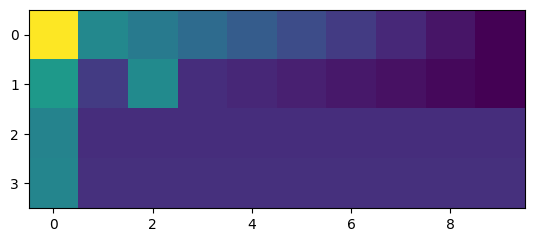

In [74]:
from matplotlib import pyplot as plt
# test1 = np.tile(np.linspace(1.2,1,4),10)
# test2 = np.repeat(np.linspace(2,1.4,10),4)
# plt.imshow(np.transpose(np.reshape(test1*test2,(10,4))))
row1 = np.linspace(1.8,1,10)
row2 = np.linspace(1.3,1,10)
row3 = np.linspace(1.2,1.2,10)
row4 = np.linspace(1.1,1.1,10)*1.1
test = np.concatenate(np.transpose(np.array([row1,row2,row3,row4])))
lowloadingsiteindex = [1,2,3,4,10]
for i in lowloadingsiteindex:
#     print(target_amps[i-1])
    test[i-1] = test[i-1]*1.4
plt.imshow(np.transpose(np.reshape(test,(10,4))))

print(test)

In [75]:
target_amps =test/np.mean(test)
target_amps

array([1.92744053, 1.39204038, 1.28496035, 1.29566836, 1.30875592,
       0.96881932, 0.91782882, 0.9254774 , 1.2407686 , 1.3206537 ,
       0.91782882, 0.9254774 , 1.17278128, 0.91782882, 0.91782882,
       0.9254774 , 1.10479396, 0.89233358, 0.91782882, 0.9254774 ,
       1.03680664, 0.86683833, 0.91782882, 0.9254774 , 0.96881932,
       0.84134309, 0.91782882, 0.9254774 , 0.90083199, 0.81584784,
       0.91782882, 0.9254774 , 0.83284467, 0.7903526 , 0.91782882,
       0.9254774 , 0.76485735, 0.76485735, 0.91782882, 0.9254774 ])

In [76]:
k_array = andor_to_k(targets)
# target_amps[0] = target_amps[0]*1.5
# target_amps[1] = target_amps[1]/1.5
# target_amps[8:10] = target_amps[32:34]*1.1
# target_amps[32:34] = target_amps[32:34]*0.9
target_file_name = "4x10Na_spacing7"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern",target_file_name,guess_phase_path = 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250207_1825014x10Na_spacing7')

20250208_210502
20250208_210504
20250208_210504
20250208_210504


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250208_2106134x10Na_spacing7_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250208_2106134x10Na_spacing7_data.npz',
 ['ok'],
 ['ok'])

In [19]:
client.send_get_current_phase_info()

20250207_154401


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250207_1444554x10Na_spacing7 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -21.5), ((2, 0), 13.5)], aperture: None']

## 1/15

In [2]:
## 1/9/25  1row for calibration
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([1,10], [22,22], 0, [365+6,340-8])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[371. 371. 371. 371. 371. 371. 371. 371. 371. 371.]
 [431. 409. 387. 365. 343. 321. 299. 277. 255. 233.]]
[[-94 -72 -50 -28  -6  16  38  60  82 104] [  2   2   2   2   2   2   2   2   2   2]]


In [6]:
target_amps[0] = 1.1
target_amps[1] = 1.1
target_amps[2] = 1.1
target_amps[6] = 0.9
target_amps[7] = 0.9
target_amps[8] = 0.85
target_amps[9] = 0.8

In [7]:
target_amps

array([1.1 , 1.1 , 1.1 , 1.  , 1.  , 1.  , 0.9 , 0.9 , 0.85, 0.8 ])

In [8]:
k_array = andor_to_k(targets)

target_file_name = "10x1Na_horizontal_pairs_rd2"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern",target_file_name, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250115_16190710x1Na_horizontal_pairs_rd1")

20250115_164814
20250115_164817
20250115_164817
20250115_164817


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250115_16491410x1Na_horizontal_pairs_rd2_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250115_16491410x1Na_horizontal_pairs_rd2_data.npz',
 ['ok'],
 ['ok'])

In [15]:
## 1/14 tilt zernike

In [11]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,2],[2,2,-27],[2,0,9.5],[1,0,0]]))
client.send_project()
client.send_get_current_phase_info()

20250117_103610
20250117_103610
20250117_103610
20250117_103610
20250117_103611
20250117_103611


['base:  additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 2.0), ((2, 2), -27.0), ((2, 0), 9.5), ((1, 0), 0.0)], aperture: None']

In [13]:
#iteration 0
targets, target_amps = utils.gen_square_targets([1,10], [12,12], 0, [365,340])

k_array = andor_to_k(targets)

target_file_name = "10x1_Na_iteration0"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20250110_150346
20250110_150349
20250110_150349
20250110_150349


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_15050910x1_Na_iteration0_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_15050910x1_Na_iteration0_data.npz',
 ['ok'],
 ['ok'])

In [11]:
#iteration 2
measured_coord = np.transpose(np.array([[365.066, 396.139],
       [364.244, 383.225],
       [365.058, 370.789],
       [365.167, 358.500],
       [365.253, 347.102],
       [365.826, 335.684],
       [365.891, 322.685],
       [366.432, 310.884],
       [366.050, 298.502],
       [364.977, 287.059]])
                             )                              


offset = new_target - measured_coord # this is already a negative feedback 
gain = 0.2
new_target2 = new_target + offset*gain
k_array = andor_to_k(new_target2)
new_target2
target_file_name = "10x1Na_iteration2"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20250110_144738
20250110_144740
20250110_144740
20250110_144741


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_14490110x1Na_iteration2_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_14490110x1Na_iteration2_data.npz',
 ['ok'],
 ['ok'])

In [12]:
new_target2

array([[365.1128, 365.1572, 366.0468, 365.7166, 365.3358, 364.9272,
        364.7786, 364.5096, 364.4684, 365.5266],
       [393.703 , 382.0502, 369.2194, 357.6696, 344.8748, 332.5952,
        320.6354, 308.8992, 296.3528, 283.2166]])

In [8]:
#iteration 1
measured_coord = np.transpose(np.array([[364.895, 393.891],
       [364.995, 381.754],
       [364.118, 370.519],
       [364.375, 358.192],
       [364.678, 346.754],
       [364.923, 334.890],
       [365.036, 323.023],
       [365.170, 310.770],
       [365.268, 299.289],
       [364.565, 288.143]]
))
offset = targets - measured_coord # this is already a negative feedback 

new_target = targets + offset
k_array = andor_to_k(new_target)

target_file_name = "10x1Na_iteration1"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20250110_142818
20250110_142820
20250110_142820
20250110_142821


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_14294110x1Na_iteration1_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_14294110x1Na_iteration1_data.npz',
 ['ok'],
 ['ok'])

In [9]:
new_target

array([[365.105, 365.005, 365.882, 365.625, 365.322, 365.077, 364.964,
        364.83 , 364.732, 365.435],
       [394.109, 382.246, 369.481, 357.808, 345.246, 333.11 , 320.977,
        309.23 , 296.711, 283.857]])

In [5]:
## 1/9/25  1row for calibration
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([1,10], [12,12], 0, [365,340])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[365. 365. 365. 365. 365. 365. 365. 365. 365. 365.]
 [394. 382. 370. 358. 346. 334. 322. 310. 298. 286.]]
[[-57 -45 -33 -21  -9   3  15  27  39  51] [ -4  -4  -4  -4  -4  -4  -4  -4  -4  -4]]


In [8]:
k_array = andor_to_k(targets)

target_file_name = "10x1_Na_alignment"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20250109_160844
20250109_160846
20250109_160847
20250109_160847


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250109_16093410x1_Na_alignment_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250109_16093410x1_Na_alignment_data.npz',
 ['ok'],
 ['ok'])

In [3]:
utils.gen_square_targets([1,10], [12,12], 0, [365,340])

(array([[365., 365., 365., 365., 365., 365., 365., 365., 365., 365.],
        [394., 382., 370., 358., 346., 334., 322., 310., 298., 286.]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [9]:
client.send_get_current_phase_info()


20250115_182633


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250115_16491410x1Na_horizontal_pairs_rd2 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 2.0), ((2, 2), -27.0), ((2, 0), 9.5), ((1, 0), 10.0)], aperture: None']

In [107]:
client.send_reset_pattern()

20241216_132413


['ok']

In [124]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment")
client.send_project()

20241217_152502
20241217_152503
20241217_152503


['ok']

In [108]:
#C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241113_13562910x1
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241212_13480810x1_Na_far-1")
client.send_project()


20241216_132417
20241216_132417
20241216_132417


['ok']

In [22]:
client.send_get_current_phase_info()

20250114_134021


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20250110_15050910x1_Na_iteration0 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 2.0), ((2, 2), -27.0), ((2, 0), 9.5), ((1, 0), 5.0)], aperture: None']

## 12/19 -- defocus Zernike

In [149]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,2],[2,2,-27],[2,0,9.5]]))
client.send_project()
client.send_get_current_phase_info()

20241220_150340
20241220_150340
20241220_150340
20241220_150340
20241220_150341
20241220_150341


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 2.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [2]:
client.send_get_current_phase_info()

20241230_172051


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 2.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

## 12/13 -- two-row pattern for alignment

In [105]:
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([2,10], [12,12], 0, [365,340])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[359. 371. 359. 371. 359. 371. 359. 371. 359. 371. 359. 371. 359. 371.
  359. 371. 359. 371. 359. 371.]
 [394. 394. 382. 382. 370. 370. 358. 358. 346. 346. 334. 334. 322. 322.
  310. 310. 298. 298. 286. 286.]]
[[-57 -57 -45 -45 -33 -33 -21 -21  -9  -9   3   3  15  15  27  27  39  39   51  51] [-10   2 -10   2 -10   2 -10   2 -10   2 -10   2 -10   2 -10   2 -10   2  -10   2]]


In [106]:
k_array = andor_to_k(targets)

target_file_name = "10x2_Na_alignment"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20241213_110701
20241213_110703
20241213_110703
20241213_110704


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment_data.npz',
 ['ok'],
 ['ok'])

## 12/12 -- Search for double excitation resonance

In [121]:
#11/13
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([1,10], [6,12], 0, [364,340])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[364. 364. 364. 364. 364. 364. 364. 364. 364. 364.]
 [394. 382. 370. 358. 346. 334. 322. 310. 298. 286.]]
[[-57 -45 -33 -21  -9   3  15  27  39  51] [ -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]]


In [122]:
k_array = andor_to_k(targets)

target_file_name = "10x1_Na_far-6"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20241216_191546
20241216_191548
20241216_191548
20241216_191549


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241216_19163710x1_Na_far-6_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241216_19163710x1_Na_far-6_data.npz',
 ['ok'],
 ['ok'])

## 11/13 -- Dual-species interactions

In [93]:
#11/13
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([1,10], [6,12], 0, [366,337])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[366. 366. 366. 366. 366. 366. 366. 366. 366. 366.]
 [391. 379. 367. 355. 343. 331. 319. 307. 295. 283.]]
[[-54 -42 -30 -18  -6   6  18  30  42  54] [ -3  -3  -3  -3  -3  -3  -3  -3  -3  -3]]


In [12]:
k_array = andor_to_k(targets)

target_file_name = "10x1_Na"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20241113_135606
20241113_135608
20241113_135608
20241113_135609


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241113_13562910x1_Na_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241113_13562910x1_Na_data.npz',
 ['ok'],
 ['ok'])

## 11/11 -- Single-species pairwise interactions

In [2]:
#11/11

def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets
targets, target_amps = utils.gen_square_targets([2,10], [6,12], 0, [366,337])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[363. 369. 363. 369. 363. 369. 363. 369. 363. 369. 363. 369. 363. 369.
  363. 369. 363. 369. 363. 369.]
 [391. 391. 379. 379. 367. 367. 355. 355. 343. 343. 331. 331. 319. 319.
  307. 307. 295. 295. 283. 283.]]
[[-54 -54 -42 -42 -30 -30 -18 -18  -6  -6   6   6  18  18  30  30  42  42   54  54] [ -6   0  -6   0  -6   0  -6   0  -6   0  -6   0  -6   0  -6   0  -6   0   -6   0]]


In [3]:
k_array = andor_to_k(targets)

target_file_name = "10x2_Na_pairs"
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20241111_155043
20241111_155046
20241111_155046
20241111_155046


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241111_15510410x2_Na_pairs_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241111_15510410x2_Na_pairs_data.npz',
 ['ok'],
 ['ok'])

In [3]:
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241111_10x2_pairs.yml")
client.send_project()


20241205_112101
20241205_112101
20241205_112102
20241205_112102
20241205_112102


['ok']

In [125]:
client.send_get_current_phase_info()

20241219_134341


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241213_11080710x2_Na_alignment additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -5.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [78]:
client.send_reset_add_phase()
#client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\lib\\Na_config\\20241003_zigzag.yml")
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241011_bigarray.yml")
client.send_project()
client.send_get_current_phase_info()

20241211_172324
20241211_172324
20241211_172324
20241211_172324
20241211_172324
20241211_172325
20241211_172325


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241011_16511013x8_big additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -1.0), ((2, 2), -28.0), ((2, 0), 3.5)], aperture: None']

In [6]:
client.send_reset_add_phase()
client.send_project()


20241007_101806
20241007_101806


['ok']

In [13]:
client.send_get_current_phase_info()

20241111_154641


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241111_15333710x2_Na_pairs additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -5.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [82]:
client.save_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241211_1x10array_top5.yml")

20241211_172535
20241211_172535


In [10]:
#20240820_11534620x1zigzag_feedback6_rditeration5_data
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\")
client.send_project()

20241007_102040
20241007_102040
20241007_102040


['ok']

In [15]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240820_11534620x1zigzag_feedback6_rditeration5")
client.send_project()

20241007_103212
20241007_103213
20241007_103213


['ok']

In [17]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241004_23234220x1zigzag_feedback7_rditeration5")
client.send_project()

20241007_103242
20241007_103243
20241007_103243


['ok']

In [8]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240528_1357073x1_horizontal_test")
client.send_project()

20240626_133145
20240626_133146
20240626_133146


['ok']

In [14]:
# client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\202405281")
# client.send_project()
client.send_reset_pattern()
client.send_reset_add_phase()

client.send_project()

20241111_154916
20241111_154916


['ok']

In [79]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-5],[2,2,-27],[2,0,9.5]]))
client.send_project()
client.send_get_current_phase_info()

20241211_172349
20241211_172349
20241211_172349
20241211_172349
20241211_172349
20241211_172349


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241011_16511013x8_big additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -5.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [39]:
client.send_get_current_phase_info()

20241020_175414


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241014_19574613x8_bigiteration5 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -2.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [ ]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-13],[2,2,-5],[2,0,5]]))

# notice = client.send_zernike_poly(np.array([[2,2,-22],[2,0,-2],[2,1,-6]]))

client.send_project()
client.send_get_current_phase_info()

In [12]:
client.send_get_current_phase_info()

20241011_164139


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241004_23234220x1zigzag_feedback7_rditeration5 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -1.0), ((2, 2), -28.0), ((2, 0), 3.5)], aperture: None']

In [116]:
ntargets = 2
targets = np.zeros((2, ntargets))
# targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
# targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates
targets[0,:] = np.array([1002,1024])# x coordinates
targets[1,:] = np.array([1011,1011]) # y coordinates
target_amps = np.array([[1., 1]])# the same order in box

In [117]:
target_file_name = "2x1_horizontal_test"
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)


20240528_165236
20240528_165239
20240528_165239
20240528_165239


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240528_1652352x1_horizontal_test_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240528_1652352x1_horizontal_test_data.npz',
 ['ok'],
 ['ok'])

7/15 

In [7]:
k_coordinate = np.array([[ 770.,  800.,  830.,  860.,  890.,  920.,  950.,  980., 1010.,
        1040.,  785.,  815.,  845.,  875.,  905.,  935.,  965.,  995.,
        1025., 1055.],
       [ 990.,  990.,  990.,  990.,  990.,  990.,  990.,  990.,  990.,
         990., 1010., 1010., 1010., 1010., 1010., 1010., 1010., 1010.,
        1010., 1010.]])
k_to_andor(k_coordinate)

array([[375.53323685, 374.99636306, 374.45948928, 373.92261549,
        373.38574171, 372.84886793, 372.31199414, 371.77512036,
        371.23824657, 370.70137279, 383.48386868, 382.9469949 ,
        382.41012111, 381.87324733, 381.33637354, 380.79949976,
        380.26262598, 379.72575219, 379.18887841, 378.65200462],
       [193.69552986, 206.49989058, 219.3042513 , 232.10861202,
        244.91297274, 257.71733346, 270.52169418, 283.3260549 ,
        296.13041562, 308.93477634, 200.34498477, 213.14934549,
        225.95370621, 238.75806693, 251.56242765, 264.36678837,
        277.17114909, 289.97550981, 302.77987053, 315.58423125]])

# BIG ARRAY

In [7]:
# 7_13_24
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets

In [43]:
targets, target_amps = utils.gen_square_targets([8,13], [15, 15], 0, [373,338])
print(targets)

[[320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5
  380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5
  320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5
  380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5
  320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5
  380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5
  320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5
  380.5 395.5 410.5 425.5 320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5
  320.5 335.5 350.5 365.5 380.5 395.5 410.5 425.5]
 [428.  428.  428.  428.  428.  428.  428.  428.  413.  413.  413.  413.
  413.  413.  413.  413.  398.  398.  398.  398.  398.  398.  398.  398.
  383.  383.  383.  383.  383.  383.  383.  383.  368.  368.  368.  368.
  368.  368.  368.  368.  353.  353.  353.  353.  353.  353.  353.  353.
  338.  338.  338.  338.  338.  338.  338.  338.  323.  323.  323

In [44]:
k_array = andor_to_k(targets)
k_array

array([[1322.1468 , 1321.0908 , 1320.0348 , 1318.9788 , 1317.9228 ,
        1316.8668 , 1315.8108 , 1314.7548 , 1287.0468 , 1285.9908 ,
        1284.9348 , 1283.8788 , 1282.8228 , 1281.7668 , 1280.7108 ,
        1279.6548 , 1251.9468 , 1250.8908 , 1249.8348 , 1248.7788 ,
        1247.7228 , 1246.6668 , 1245.6108 , 1244.5548 , 1216.8468 ,
        1215.7908 , 1214.7348 , 1213.6788 , 1212.6228 , 1211.5668 ,
        1210.5108 , 1209.4548 , 1181.7468 , 1180.6908 , 1179.6348 ,
        1178.5788 , 1177.5228 , 1176.4668 , 1175.4108 , 1174.3548 ,
        1146.6468 , 1145.5908 , 1144.5348 , 1143.4788 , 1142.4228 ,
        1141.3668 , 1140.3108 , 1139.2548 , 1111.5468 , 1110.4908 ,
        1109.4348 , 1108.3788 , 1107.3228 , 1106.2668 , 1105.2108 ,
        1104.1548 , 1076.4468 , 1075.3908 , 1074.3348 , 1073.2788 ,
        1072.2228 , 1071.1668 , 1070.1108 , 1069.0548 , 1041.3468 ,
        1040.2908 , 1039.2348 , 1038.1788 , 1037.1228 , 1036.0668 ,
        1035.0108 , 1033.9548 , 1006.2468 , 1005

In [45]:
target_file_name = "13x8_big"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20241029_174708
20241029_174711
20241029_174711
20241029_174711


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241029_17473313x8_big_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241029_17473313x8_big_data.npz',
 ['ok'],
 ['ok'])

In [47]:
client.send_get_current_phase_info()

20241029_180016


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241029_17473313x8_big additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), 20.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [48]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
client.send_zernike_poly(np.array([[2,1,-5],[2,2,-27],[2,0,9.5]]))

# notice = client.send_zernike_poly(np.array([[2,2,-22],[2,0,-2],[2,1,-6]]))

client.send_project()
client.send_get_current_phase_info()

20241029_180122
20241029_180122
20241029_180122
20241029_180122
20241029_180123
20241029_180123


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241029_17473313x8_big additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -5.0), ((2, 2), -27.0), ((2, 0), 9.5)], aperture: None']

In [32]:
client.save_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241011_bigarray.yml")

20241011_184741
20241011_184741


In [27]:
def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 337])).replace("\n", ""))

[[-90 -90 -90 -90 -90 -90 -90 -90 -75 -75 -75 -75 -75 -75 -75 -75 -60 -60  -60 -60 -60 -60 -60 -60 -45 -45 -45 -45 -45 -45 -45 -45 -30 -30 -30 -30  -30 -30 -30 -30 -15 -15 -15 -15 -15 -15 -15 -15   0   0   0   0   0   0    0   0  15  15  15  15  15  15  15  15  30  30  30  30  30  30  30  30   45  45  45  45  45  45  45  45  60  60  60  60  60  60  60  60  75  75   75  75  75  75  75  75  90  90  90  90  90  90  90  90] [-52 -38 -22  -8   8  22  38  52 -52 -38 -22  -8   8  22  38  52 -52 -38  -22  -8   8  22  38  52 -52 -38 -22  -8   8  22  38  52 -52 -38 -22  -8    8  22  38  52 -52 -38 -22  -8   8  22  38  52 -52 -38 -22  -8   8  22   38  52 -52 -38 -22  -8   8  22  38  52 -52 -38 -22  -8   8  22  38  52  -52 -38 -22  -8   8  22  38  52 -52 -38 -22  -8   8  22  38  52 -52 -38  -22  -8   8  22  38  52 -52 -38 -22  -8   8  22  38  52]]


# 7/18 

In [67]:
kcoords = np.array([[1002., 1024., 1046., 1068.],
       [1011., 1011., 1011., 1011.]])
A
k_to_andor(kcoords)

array([[380.01143508, 379.61772764, 379.22402019, 378.83031275],
       [292.9755577 , 302.36542223, 311.75528676, 321.14515129]])

# 7/13 - Promotional Pattern

In [5]:
# 7_13_24
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets

In [5]:
#
# 1     41 45
# 2     42 46
# 3     43 47
# 4     44 48
targets, target_amps = utils.gen_square_targets([8,8], [10, 10], 0, [369,257])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 257])).replace("\n", ""))

[[334. 344. 354. 364. 374. 384. 394. 404. 334. 344. 354. 364. 374. 384.
  394. 404. 334. 344. 354. 364. 374. 384. 394. 404. 334. 344. 354. 364.
  374. 384. 394. 404. 334. 344. 354. 364. 374. 384. 394. 404. 334. 344.
  354. 364. 374. 384. 394. 404. 334. 344. 354. 364. 374. 384. 394. 404.
  334. 344. 354. 364. 374. 384. 394. 404.]
 [292. 292. 292. 292. 292. 292. 292. 292. 282. 282. 282. 282. 282. 282.
  282. 282. 272. 272. 272. 272. 272. 272. 272. 272. 262. 262. 262. 262.
  262. 262. 262. 262. 252. 252. 252. 252. 252. 252. 252. 252. 242. 242.
  242. 242. 242. 242. 242. 242. 232. 232. 232. 232. 232. 232. 232. 232.
  222. 222. 222. 222. 222. 222. 222. 222.]]
[[-35 -35 -35 -35 -35 -35 -35 -35 -25 -25 -25 -25 -25 -25 -25 -25 -15 -15  -15 -15 -15 -15 -15 -15  -5  -5  -5  -5  -5  -5  -5  -5   5   5   5   5    5   5   5   5  15  15  15  15  15  15  15  15  25  25  25  25  25  25   25  25  35  35  35  35  35  35  35  35] [-35 -25 -15  -5   5  15  25  35 -35 -25 -15  -5   5  15  25  35 -35 -25  -

In [6]:
k_array = andor_to_k(targets)
k_array

array([[1002.9564, 1002.2524, 1001.5484, 1000.8444, 1000.1404,  999.4364,
         998.7324,  998.0284,  979.5564,  978.8524,  978.1484,  977.4444,
         976.7404,  976.0364,  975.3324,  974.6284,  956.1564,  955.4524,
         954.7484,  954.0444,  953.3404,  952.6364,  951.9324,  951.2284,
         932.7564,  932.0524,  931.3484,  930.6444,  929.9404,  929.2364,
         928.5324,  927.8284,  909.3564,  908.6524,  907.9484,  907.2444,
         906.5404,  905.8364,  905.1324,  904.4284,  885.9564,  885.2524,
         884.5484,  883.8444,  883.1404,  882.4364,  881.7324,  881.0284,
         862.5564,  861.8524,  861.1484,  860.4444,  859.7404,  859.0364,
         858.3324,  857.6284,  839.1564,  838.4524,  837.7484,  837.0444,
         836.3404,  835.6364,  834.9324,  834.2284],
       [ 899.079 ,  923.382 ,  947.685 ,  971.988 ,  996.291 , 1020.594 ,
        1044.897 , 1069.2   ,  898.06  ,  922.363 ,  946.666 ,  970.969 ,
         995.272 , 1019.575 , 1043.878 , 1068.181 ,  897.04

In [7]:
ntargets = targets.shape[1]
target_file_name = "8x8"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240713_150106
20240713_150108
20240713_150108
20240713_150109


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240713_1501008x8_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240713_1501008x8_data.npz',
 ['ok'],
 ['ok'])

# 7/3 - Calibration

In [9]:
# 6_21_24
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets

In [18]:
#
# 1     51 56
# 2     52 57
# 3     53 58
# 4     54 59
# 5     55 60
targets, target_amps = utils.gen_square_targets([5,12], [20, 10], 0, [369,257])
print(targets)

def andor_to_img(targets, center):
    x_array = targets
    ntargets = x_array.shape[1]
    firstcoord_center = center[0]
    secondcoord_center = center[1]
    #subtract off center and reflect second coord, then round and cast to int
    x_array_cam = np.round((x_array - np.array([np.ones((ntargets))*firstcoord_center,np.ones((ntargets))*secondcoord_center]))*np.array([[1],[-1]])).astype(int)
    x_array_cam[[0, 1]] = x_array_cam[[1, 0]]
    return x_array_cam

print(str(andor_to_img(targets, [369, 257])).replace("\n", ""))

[[329. 349. 369. 389. 409. 329. 349. 369. 389. 409. 329. 349. 369. 389.
  409. 329. 349. 369. 389. 409. 329. 349. 369. 389. 409. 329. 349. 369.
  389. 409. 329. 349. 369. 389. 409. 329. 349. 369. 389. 409. 329. 349.
  369. 389. 409. 329. 349. 369. 389. 409. 329. 349. 369. 389. 409. 329.
  349. 369. 389. 409.]
 [312. 312. 312. 312. 312. 302. 302. 302. 302. 302. 292. 292. 292. 292.
  292. 282. 282. 282. 282. 282. 272. 272. 272. 272. 272. 262. 262. 262.
  262. 262. 252. 252. 252. 252. 252. 242. 242. 242. 242. 242. 232. 232.
  232. 232. 232. 222. 222. 222. 222. 222. 212. 212. 212. 212. 212. 202.
  202. 202. 202. 202.]]
[[-55 -55 -55 -55 -55 -45 -45 -45 -45 -45 -35 -35 -35 -35 -35 -25 -25 -25  -25 -25 -15 -15 -15 -15 -15  -5  -5  -5  -5  -5   5   5   5   5   5  15   15  15  15  15  25  25  25  25  25  35  35  35  35  35  45  45  45  45   45  55  55  55  55  55] [-40 -20   0  20  40 -40 -20   0  20  40 -40 -20   0  20  40 -40 -20   0   20  40 -40 -20   0  20  40 -40 -20   0  20  40 -40 -20  

In [19]:
k_array = andor_to_k(targets)
k_array

array([[1050.1084, 1048.7004, 1047.2924, 1045.8844, 1044.4764, 1026.7084,
        1025.3004, 1023.8924, 1022.4844, 1021.0764, 1003.3084, 1001.9004,
        1000.4924,  999.0844,  997.6764,  979.9084,  978.5004,  977.0924,
         975.6844,  974.2764,  956.5084,  955.1004,  953.6924,  952.2844,
         950.8764,  933.1084,  931.7004,  930.2924,  928.8844,  927.4764,
         909.7084,  908.3004,  906.8924,  905.4844,  904.0764,  886.3084,
         884.9004,  883.4924,  882.0844,  880.6764,  862.9084,  861.5004,
         860.0924,  858.6844,  857.2764,  839.5084,  838.1004,  836.6924,
         835.2844,  833.8764,  816.1084,  814.7004,  813.2924,  811.8844,
         810.4764,  792.7084,  791.3004,  789.8924,  788.4844,  787.0764],
       [ 888.9655,  937.5715,  986.1775, 1034.7835, 1083.3895,  887.9465,
         936.5525,  985.1585, 1033.7645, 1082.3705,  886.9275,  935.5335,
         984.1395, 1032.7455, 1081.3515,  885.9085,  934.5145,  983.1205,
        1031.7265, 1080.3325,  884.88

In [20]:
ntargets = targets.shape[1]

target_file_name = "calib_rows"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240703_144140
20240703_144142
20240703_144142
20240703_144143


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240703_144139calib_rows_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240703_144139calib_rows_data.npz',
 ['ok'],
 ['ok'])

In [70]:
client.send_reset_add_phase()
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20200429_1x4horizontal_rd6.yml")
client.send_project()

20240718_181437
20240718_181437
20240718_181438
20240718_181438
20240718_181438
20240718_181438


['ok']

In [13]:
client.send_project()

20240703_135555


['ok']

In [69]:
client.send_get_current_phase_info()

20240718_174326


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240717_08470520x1zigzag_feedback4_rditeration20 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -1.0), ((2, 2), -28.0), ((2, 0), 3.5)], aperture: [500. 500.]']

## 6/26 - Shifted ZigZag

In [21]:
# 20 x 1 array shifted to the right
ntargets = 20
targets = np.zeros((2, ntargets))
targets[0,:] = np.ones(20)*(-40) + np.array([810,825,840,855,870,885,900,915,930,945,960,975,990,1005,1020,1035,1050, 1065, 1080, 1095])# x coordinates
targets[1,:] = np.ones(20)*(-20)+ np.array([1010,1030,1010,1030,1010,1030,1010,1030, 1010, 1030,1010,1030,1010,1030,1010,1030,1010,1030, 1010, 1030]) # y coordinates

target_amps = np.array([1, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1,1,1,1,1,1])

In [22]:
targets.shape

(2, 20)

In [23]:
target_file_name = "20x1_zigzag_shift"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240626_135226
20240626_135228
20240626_135228
20240626_135229


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_13522520x1_zigzag_shift_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_13522520x1_zigzag_shift_data.npz',
 ['ok'],
 ['ok'])

In [25]:
client.send_get_current_phase_info()

20240626_162340


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_13522520x1_zigzag_shift additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), -3.0), ((2, 2), -31.0), ((2, 0), 0.0)], aperture: [500. 500.]']

In [ ]:
client.send_pattern('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_13522520x1_zigzag_shift')
client.send_project()

## 6/25 - ZigZag

In [213]:
np.ones(20)*30

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30.])

In [269]:
# 20 x 1 array
ntargets = 20
targets = np.zeros((2, ntargets))
targets[0,:] = np.ones(20)*(-40) + np.array([930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065,   1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215])# x coordinates
targets[1,:] = np.ones(20)*(-20)+ np.array([1010,1030,1010,1030,1010,1030,1010,1030, 1010, 1030,1010,1030,1010,1030,1010,1030,1010,1030, 1010, 1030]) # y coordinates

target_amps = np.array([1, 1, 1, 1,1,1,1,1, 1, 1,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1])

In [270]:
target_file_name = "20x1_zigzag_uniformitytweak_rd2"
old_guess = "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240625_18433520x1_zigzag_uniformitytweak"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name, old_guess)

20240626_122649
20240626_122652
20240626_122652
20240626_122652


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_12264820x1_zigzag_uniformitytweak_rd2_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240626_12264820x1_zigzag_uniformitytweak_rd2_data.npz',
 ['ok'],
 ['ok'])

In [56]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_use_aperture(np.array([500]))
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,-1],[2,2,-28],[2,0,3.5]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240716_152334
20240716_152335
20240716_152335
20240716_152335
20240716_152335
20240716_152336


['ok']

In [61]:
client.send_get_current_phase_info()

20240718_143711


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240717_08470520x1zigzag_feedback4_rditeration20 additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), -1.0), ((2, 2), -28.0), ((2, 0), 3.5)], aperture: [500. 500.]']

In [249]:
120/20

6.0

# 6/21 - Patterns patterns patterns

In [94]:
# 10 x 1 array
ntargets = 10
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([930, 950, 970, 990, 1010, 1030, 1050, 1070, 1090, 1110])# x coordinates
targets[1,:] = np.array([1050,1050,1050,1050,1050,1050,1050,1050, 1050, 1050]) # y coordinates

target_amps = np.array([1, 1, 1, 1,1,1,1,1, 1, 1])

In [95]:
target_file_name = "10x1_horizontal_offset"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240621_111656
20240621_111659
20240621_111659
20240621_111659


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_11164310x1_horizontal_offset_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_11164310x1_horizontal_offset_data.npz',
 ['ok'],
 ['ok'])

In [118]:
# 10 x 1 array
ntargets = 1
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([1050])# x coordinates
targets[1,:] = np.array([910]) # y coordinates

target_amps = np.array([1])

In [119]:
target_file_name = "1x1_1050_910"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240621_135332
20240621_135334
20240621_135334
20240621_135335


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1353181x1_1050_910_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1353181x1_1050_910_data.npz',
 ['ok'],
 ['ok'])

In [98]:
client.send_pattern('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_11164310x1_horizontal_offset')
client.send_project()

20240621_113723
20240621_113723


['ok']

In [103]:
# 1 x 10 array
ntargets = 10
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([1050,1050,1050,1050,1050,1050,1050,1050, 1050, 1050]) # x coordinates
targets[1,:] = np.array([910, 930, 950, 970, 990, 1010, 1030, 1050, 1070, 1090])# y coordinates


target_amps = np.array([1, 1, 1, 1,1,1,1,1, 1, 1])

In [104]:
target_file_name = "1x10_vertical_offset"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240621_115345
20240621_115347
20240621_115347
20240621_115348


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1153311x10_vertical_offset_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1153311x10_vertical_offset_data.npz',
 ['ok'],
 ['ok'])

In [134]:
# 6_21_24
def andor_to_k(x):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    targets = np.matmul(A,x)+b
    return targets

def k_to_andor(k):
    A = np.array([[-0.0704, 2.340], [2.4303, 0.1019]])
    b = np.array([[343.19], [57.604]])
    invA = np.linalg.inv(A)
    targets = np.matmul(invA, k - b)
    return targets

In [167]:
side_length = [3,9] #num columns, num rows
pixel_spacing = [10,10]
rot_angle = 0
#offset = [-1,30]
offset = [344, 299]
#offset = [0,0]
[camera_array,target_amps] = utils.gen_square_targets(side_length, pixel_spacing, rot_angle, offset)

In [168]:
camera_array

array([[334., 344., 354., 334., 344., 354., 334., 344., 354., 334., 344.,
        354., 334., 344., 354., 334., 344., 354., 334., 344., 354., 334.,
        344., 354., 334., 344., 354.],
       [339., 339., 339., 329., 329., 329., 319., 319., 319., 309., 309.,
        309., 299., 299., 299., 289., 289., 289., 279., 279., 279., 269.,
        269., 269., 259., 259., 259.]])

In [169]:
k_array = andor_to_k(camera_array)
k_array

array([[1112.9364, 1112.2324, 1111.5284, 1089.5364, 1088.8324, 1088.1284,
        1066.1364, 1065.4324, 1064.7284, 1042.7364, 1042.0324, 1041.3284,
        1019.3364, 1018.6324, 1017.9284,  995.9364,  995.2324,  994.5284,
         972.5364,  971.8324,  971.1284,  949.1364,  948.4324,  947.7284,
         925.7364,  925.0324,  924.3284],
       [ 903.8683,  928.1713,  952.4743,  902.8493,  927.1523,  951.4553,
         901.8303,  926.1333,  950.4363,  900.8113,  925.1143,  949.4173,
         899.7923,  924.0953,  948.3983,  898.7733,  923.0763,  947.3793,
         897.7543,  922.0573,  946.3603,  896.7353,  921.0383,  945.3413,
         895.7163,  920.0193,  944.3223]])

In [170]:
andor_to_k(np.array([[369], [307]]))

array([[1035.5924],
       [ 985.668 ]])

In [171]:
target_file_name = "3x9_vertical_offset"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240621_180359
20240621_180402
20240621_180402
20240621_180402


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1803593x9_vertical_offset_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1803593x9_vertical_offset_data.npz',
 ['ok'],
 ['ok'])

In [147]:
# ELQ
# E
# Cs Na Cs
# Na
# Cs Na Cs
# Na
# Cs Na Cs

# targets in andor space
# top left corner (319, 357)
ntargets = 5
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([335, 340, 345, 350, 355]) # x coordinates
targets[1,:] = np.array([340, 345, 340, 345, 340])# y coordinates

target_amps = np.array([1, 1, 1, 1,1])

k_array = andor_to_k(targets)

target_file_name = "ELQ_E"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(k_array, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240621_151258
20240621_151300
20240621_151300
20240621_151301


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_151257ELQ_E_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_151257ELQ_E_data.npz',
 ['ok'],
 ['ok'])

## 6/20 - Offset 4 atom pattern

In [73]:
ntargets = 8
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([970,1000,1030,1060,970,1000,1030,1060])# x coordinates
targets[1,:] = np.array([1070,1070,1070,1070,1050,1050,1050,1050]) # y coordinates

target_amps = np.array([1, 1, 1, 1,1,1,1,1])

In [74]:
target_file_name = "8x1_horizontal_offset"
#[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240620_142616
20240620_142619
20240620_142619
20240620_142619


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240620_1426068x1_horizontal_offset_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240620_1426068x1_horizontal_offset_data.npz',
 ['ok'],
 ['ok'])

In [204]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_use_aperture(np.array([500]))
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,3],[2,2,-25],[2,0,0]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240625_145054
20240625_145055
20240625_145056
20240625_145056
20240625_145056
20240625_145056


['ok']

In [192]:
client.send_get_current_phase_info()

20240625_134454


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240621_1803593x9_vertical_offset additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), -3.0), ((2, 2), -25.0), ((2, 0), 0.0)], aperture: [500. 500.]']

## 5/31 - 4 atom pattern

In [54]:
ntargets = 4
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates

target_amps = np.array([.95, 1, 1.1, 1])

In [55]:
target_file_name = "4x1_horizontal_rd3"
old_guess_file_name = "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240531_1139194x1_horizontal_rd2" #initial phase guess file name, need to remove _data.npz
[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name, old_guess_file_name)
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240531_114406
20240531_114408
20240531_114408
20240531_114409
20240531_114428
20240531_114430
20240531_114430
20240531_114431


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240531_1144224x1_horizontal_rd3_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240531_1144224x1_horizontal_rd3_data.npz',
 ['ok'],
 ['ok'])

In [62]:
client.send_get_current_phase_info()

20240531_120548


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240531_1144224x1_horizontal_rd3 additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), -12.0), ((2, 2), 0.0), ((2, 0), 0.0)], aperture: [500. 500.]']

In [3]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_use_aperture(np.array([500]))
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,-12],[2,2,0],[2,0,0]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240607_102823
20240607_102825
20240607_102825
20240607_102825
20240607_102825
20240607_102825


['ok']

## Default pattern configs -- do not touch

Here is the config for our standard 4 atom column. Execute the cell below when resetting the SLM server to restore the usual config.

In [2]:
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200402_1x4vertical.yml")
client.send_project()
client.send_get_current_phase_info()

20240424_141517
20240424_141517
20240424_141517
20240424_141517
20240424_141517
20240424_141517


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240324_1732214x1 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -15.0), ((2, 2), -5.0), ((2, 0), 10.0)],']

Use the next one to reset the pattern and additional phase and project.

In [3]:
client.send_reset_add_phase()
client.send_reset_pattern()
client.send_project()

20240517_102212
20240517_102212
20240517_102212


['ok']

Here is the config for our 4 atom row. Execute the cell below for this.

In [59]:
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200402_1x4horizontal.yml")
client.send_project()
client.send_get_current_phase_info()

20240517_145202
20240517_145202
20240517_145202
20240517_145203
20240517_145203
20240517_145203


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240402_1456194x1_vertical additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -35.0), ((2, 2), -50.0), ((2, 0), 10.0)],file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -15.0), ((2, 2), -5.0), ((2, 0), 10.0)], aperture: None']

In [57]:
client.send_reset_pattern()
client.send_project()

20240517_144350
20240517_144350


['ok']

In [79]:
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200429_1x4horizontal.yml")
client.send_project()
client.send_get_current_phase_info()

20240507_172639
20240507_172639
20240507_172639
20240507_172640
20240507_172640
20240507_172640


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240426_1939034x1_horizontal_test_rd3 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -15.0), ((2, 2), -5.0), ((2, 0), 10.0)],']

In [72]:
# 3_18 
#client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200220_1x3_large_spacing_Andor20_2.yml")
client.send_get_current_phase_info()

20240718_192212


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240426_1714154x1_horizontal_test additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -15.0), ((2, 2), -5.0), ((2, 0), 10.0)], aperture: [500. 500.]']

In [2]:
client.send_project()




Error in client function: Operation cannot be accomplished in current state


In [43]:
client.send_reset_add_phase()
client.send_reset_pattern()
client.send_project()

20240411_095358
20240411_095358
20240411_095358


['ok']

In [80]:
client.load_and_project("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20241210_13525510x1_Na_1pxshift_top5")
client.send_project()

20241211_172424
20241211_172424
20241211_172424


['ok']

In [62]:
client.send_offset(np.array([-1,0]))

Error in client function: Operation cannot be accomplished in current state


In [61]:
client.send_project()

20240319_222316


[None]

20240527_172847
20240527_172847
20240527_172847
20240527_172847


['ok']

# General feedback recipe

$\textbf{Step 0}$: Populate the server_config yml file on the SLM computer and make sure it has the correct scan name and number of sequences.

$\textbf{Step 1a}$: Initiate the feedback server on the tweezer computer (i.e. start the notebook titled feedback_server).

$\textbf{Step 1b}$: Initiate the SLM server on the SLM computer.

$\textbf{Step 2}$: Load the SLM hologram object: 

In [78]:
config_file_name = '20200429_1x4horizontal'
target_file_name = '20240426_1939034x1_horizontal_test_rd3'

#Clear any Zernikes there already
client.send_reset_add_phase()
client.send_project()

#First actually load config file: Zernikes, pattern, etc., and send it to screen
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\" + config_file_name + ".yml")
client.send_project()

#Now load the corresponding hologram object
client.send_init_hologram("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\" + target_file_name)

20240430_103449
20240430_103449
20240430_103449
20240430_103449
20240430_103449
20240430_103450
20240430_103450
20240430_103450


['ok']

$\textbf{Step 3}$: Establish MATLAB communication to the feedback server by running AndorServer.get([path to communication yml]) in the active MATLAB instance.

$\textbf{Step 4}$: Run send_perform_scan_feedback from the client python:

In [77]:
feedback_iterations = 5
num_seqs = 1500
client.send_perform_scan_feedback(feedback_iterations, num_seqs)

20240430_015659


['ok']

$\textbf{Step 5}$: Run serv.handle_msg() in the active MATLAB instance to get the MATLAB going. 

# Feedback via WGS target

Here we attempt to feed back on trap intensities by just asking WGS for a different target distribution. See notebook for 4/30 for details. We note that the site numbers are flipped here, so the order to be specified in target amplitudes is site 4-site 1. 

In [161]:
ntargets = 1
targets = np.zeros((2, ntargets))
# targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
# targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates

targets[0,:] = np.array([1074])
targets[1,:] = np.array([976])

# target_amps = np.array([[0.48, 0.43, 0.53,0.59]])
target_amps = np.array([1])

In [162]:
target_file_name = "1074_976"#"4x1_horizontal_test_rd4"
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)


20240523_184451
20240523_184453
20240523_184453
20240523_184453


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240523_1844511074_976_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240523_1844511074_976_data.npz',
 ['ok'],
 ['ok'])

First we assume the Zernikes are all the same. To reload them I created a config file identical to the last one but just changed the pattern file.

In [64]:
config_file_name = '20200429_1x4horizontal_rd6'

#Clear any Zernikes there already
client.send_reset_add_phase()
client.send_project()

#First actually load config file: Zernikes, pattern, etc., and send it to screen
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\" + config_file_name + ".yml")
client.send_project()

20240718_153154
20240718_153155
20240718_153155
20240718_153155
20240718_153155
20240718_153155
20240718_153155


['ok']

Next round:

In [86]:
ntargets = 4
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates

target_amps = np.array([[1, 1, 1, 1]])

In [87]:
target_file_name = "4x1_horizontal_test_rd6"
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)


20240430_113425
20240430_113428
20240430_113428
20240430_113428


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240430_1133434x1_horizontal_test_rd6_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240430_1133434x1_horizontal_test_rd6_data.npz',
 ['ok'],
 ['ok'])

In [6]:
client.send_use_aperture(np.array([500]))
client.send_project()

20240530_174346
20240530_174346


['ok']

In [41]:
config_file_name = '20240718_uniformzigzag.yml'

#Clear any Zernikes there already
client.send_reset_add_phase()
client.send_project()

#First actually load config file: Zernikes, pattern, etc., and send it to screen
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\" + config_file_name + ".yml")
client.send_project()

20240522_132744
20240522_132744
20240522_132745
20240522_132745
20240522_132745
20240522_132745
20240522_132745


['ok']

This regenerated array is pretty uniform. Let's now try to feed back on the Zernikes and monitor the average light shift, to see if we can maximize it.

In [71]:
#Initial corrections
client.get_current_info()

AttributeError: 'Client' object has no attribute 'get_current_info'

In [6]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,-15],[2,2,-5],[2,0,10]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240521_190257
20240521_190257
20240521_190257
20240521_190257
20240521_190257


['ok']

In [154]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,0]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()

20240523_182720
20240523_182720
20240523_182720
20240523_182720
20240523_182720


['ok']

# Feedback with old phase guess
The idea is to import an initial phase guess for WGS. This way our feedback on target amplitudes will begin from the old configuration and should be repeatable. 

In [31]:
ntargets = 4
targets = np.zeros((2, ntargets))
targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates
# targets[0,:] = np.array([1002,1024,1046,1100])# x coordinates
# targets[1,:] = np.array([1011,1011,1011,950]) # y coordinates

#target_amps = np.array([[0.49, 0.48, 0.5,0.53]])
target_amps = np.array([[0.5, 0.5, 0.5, 0.5]])

In [32]:
target_file_name = "normal_1x4hori" #where to save new pattern
old_guess_file_name = ""#"C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240501_1351394x1_horizontal_test_iteration5" #initial phase guess file name, need to remove _data.npz
[_,targetname,_,_] = client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name, old_guess_file_name)
print('This phase guess will be stored at %s' % targetname)
#lient.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name, old_guess_file_name)

20240528_113337
20240528_113339
20240528_113339
20240528_113339
This phase guess will be stored at C:\msys64\home\nilab\projects\NaCsSLM\lib\Na_pattern\20240528_113332normal_1x4hori_data.npz


In [141]:
#Recreate correction pattern
client.send_reset_add_phase()
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,0,10],[2,2,-50],[2,1,-15],[3,2,-5],[3,1,3]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()
client.send_get_current_phase_info()


20240522_184716
20240522_184716
20240522_184716
20240522_184717
20240522_184717
20240522_184717


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240426_1714154x1_horizontal_test additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 0), 10.0), ((2, 2), -50.0), ((2, 1), -15.0), ((3, 2), -5.0), ((3, 1), 3.0)], aperture: None']

# Correction Pattern 
## generation and project

In [176]:
client.send_reset_add_phase()
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([-6.0e5]))
#notice = client.send_zernike_poly(np.array([[2,2,-20],[2,1,5]]))
#notice = client.send_zernike_poly(np.array([[2,2,-5],[2,1,-10], [2,0,10]]))
# notice = client.send_zernike_poly(np.array([[2,2,-5],[2,1,-15], [2,0,10]]))
notice = client.send_zernike_poly(np.array([[2,2,0],[2,1,-12], [2,0,0]]))
# notice = client.send_zernike_poly(np.array([[2,2,-50],[2,0,20],[3,2,0],[3,1,0]]))
client.send_project()

20240523_192042
20240523_192042
20240523_192042
20240523_192042
20240523_192042


['ok']

In [177]:
client.send_get_current_phase_info()

20240524_134906


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240523_1844511074_976 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 2), 0.0), ((2, 1), -12.0), ((2, 0), 0.0)], aperture: [10000. 10000.]']

AttributeError: 'Client' object has no attribute 'get_spot_amps'

## reset

In [35]:
client.send_reset_add_phase()
client.send_project()

20240228_175344
20240228_175344


['ok']

# Calibration

In [1]:
client.send_reset_add_phase()
client.load_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241007_uniformzigzag_todozernike.yml")
client.send_project()

NameError: name 'client' is not defined

In [150]:
# start a new calibration
client.send_perform_fourier_calibration(np.array([6,5]), np.array([25,25]))

20240216_142954


['ok']

In [153]:
# save the current calibration
calibration_file_name = "Na_0216_calibration_bishop_flipper"
client.send_save_fourier_calibration("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib", calibration_file_name)

20240216_143420


['C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_0216_calibration_bishop_flipper_00000.h5']

In [2]:
# load a calibration file
client.send_load_fourier_calibration('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_0216_calibration_bishop_flipper_00000.h5')

20240216_152656


['ok']

In [61]:
client.send_get_current_phase_info()

20240429_180716


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240426_1939034x1_horizontal_test_rd3 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 1), -15.0), ((2, 2), -5.0), ((2, 0), 10.0)],']

In [19]:
client.save_config("C:\\experiment-control\\matlab_new\\NaCsSLM\\lib\\Na_config\\20241007_uniformzigzag_todozernike.yml")

20241007_103401
20241007_103401


In [18]:
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200402_1x4vertical.yml")

20240402_152741
20240402_152741
20240402_152741
20240402_152742


In [19]:
client.send_project()



20240402_152743


['ok']

In [42]:
client.send_perform_scan_feedback(2, 1300)

20240425_173044


['ok']

In [14]:
client.send_reset_pattern()
client.send_reset_add_phase()
client.load_config("C:\\msys64\\home\\Simulation Computer\\projects\\NaCsSLM\\lib\\Na_config\\20200220_1x3_large_spacing_Andor20_2.yml")
client.send_project()

20240318_150516
20240318_150516
20240318_150516
20240318_150516
20240318_150516
20240318_150516
20240318_150517


['ok']

In [9]:
client.send_get_current_phase_info()

20240318_150034


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240318_1458422x3 additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 2), 0.0), ((2, 1), -15.0)],']

In [48]:
# 6x6 array
ntargets = 1
targets = np.zeros((2, ntargets))

targets[0,:] = [1024]
targets[1,:] = [1011]

target_amps = np.array([1])#np.ones((1, ntargets))
target_file_name = str(targets[0,0]) + '_' + str(targets[1,0])
client.calculate_save_and_project(targets, target_amps, 20,"C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern" ,target_file_name)

20240229_103127
20240229_103129
20240229_103129
20240229_103129


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240229_1031231024.0_1011.0_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240229_1031231024.0_1011.0_data.npz',
 ['ok'],
 ['ok'])

# Code 2/16

In [16]:
targets1, target_amps1 = utils.gen_square_targets([2,1], 118, 0.06981317007977318, [610, 480 + 118])
targets2, target_amps2 = utils.gen_square_targets([2,1], 118, 0.06981317007977318, [610 + 23, 480 + 118])
targets = np.concatenate((targets1,targets2),axis=1)
target_amps = np.concatenate((target_amps1, target_amps2))
target_file_name = "Na_pairs"
WGS_iterations = 40
client.calculate_save_and_project(targets, target_amps, WGS_iterations, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern" ,target_file_name)

20240216_163650
20240216_163653
20240216_163653
20240216_163653


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_163646Na_pairs_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_163646Na_pairs_data.npz',
 ['ok'],
 ['ok'])

In [17]:
client.send_perform_camera_feedback(30)

20240216_163850


['ok']

In [18]:
uniform_hologram_file_name = "Na_pairs_with_feedback"
client.send_save("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", uniform_hologram_file_name)

20240216_163930


['C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_163923Na_pairs_with_feedback_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_163923Na_pairs_with_feedback_data.npz']

# Target array
## Generate target array

In [27]:
ntargets = 2
targets = np.zeros((2, ntargets))

# targets[0,:] = np.array([1024,1069,1115])# x coordinates
# targets[1,:] = np.array([1011,1011,1011]) # y coordinates

# targets[0,:] = np.array([1115,1024,1069])# x coordinates
# targets[1,:] = np.array([1011,1011,1011]) # y coordinates

# target_amps = np.ones((1,ntargets))
# target_amps = np.array([[1, 1, 1,1]])
targets[0,:] = np.array([1046, 1068])
targets[1,:] = np.array([1011, 1011])

target_amps = np.ones((1, 2))

921

In [55]:
ntargets = 4
targets = np.zeros((2, ntargets))
# targets[0,:] = np.array([1024])# x coordinates
# targets[1,:] = np.array([1011]) # y coordinates
targets[0,:] = np.array([1002,1024,1046,1068])# x coordinates
targets[1,:] = np.array([1011,1011,1011,1011]) # y coordinates

# targets[0,:] = np.array([1024,1069,1115,1024,1069,1115,1024,1069,1115])# x coordinates
# targets[1,:] = np.array([1011,1011,1011,1056,1056,1056,1101,1101,1101]) # y coordinates

# target_amps = np.ones((1,ntargets))
target_amps = np.array([[1, 1.07, 0.95,0.95]])

In [56]:
str(target_amps)

'[[1.   1.07 0.95 0.95]]'

In [28]:
target_file_name = "2x1_horizontal"
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)


20240522_110803
20240522_110805
20240522_110805
20240522_110806


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240522_1108022x1_horizontal_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240522_1108022x1_horizontal_data.npz',
 ['ok'],
 ['ok'])

In [ ]:
client.send_perform_scan_feedback(2, 250)

In [104]:
client.send_get_current_phase_info()

20240325_102536


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240324_1732214x1 additional: fresnel_lens:-600000.,file_correction:C:\\\\msys64\\\\home\\\\nilab\\\\projects\\\\NaCsSLM\\\\lib\\\\Na_Correction_Patterns\\\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), -15.0), ((2, 2), 0.0), ((2, 0), 20.0)],']

In [3]:
client.load_and_project('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240324_1732214x1')

20240329_113112
20240329_113112


(['ok'], ['ok'])

## Project the target array

In [155]:
target_file_name = "610_480"
client.calculate_save_and_project(targets, target_amps, 20, "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", target_file_name)

20240216_143457
20240216_143459
20240216_143459
20240216_143500


('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_143453610_480_config.yml',
 'C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_143453610_480_data.npz',
 ['ok'],
 ['ok'])

# Uniformity feedback

In [ ]:
# define a target first 
client.send_calculate(targets, target_amps, 20)
uniformity_feedback_iterations = 10
client.send_perform_camera_feedback(uniformity_feedback_iterations)

In [ ]:
uniform_hologram_file_name = "1x3_with_feedback"
client.send_save("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern", uniform_hologram_file_name)

# Daily operation 

In [ ]:
# load a fourier calibration
client.send_load_fourier_calibration('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_0207_calibration_00000.h5')

In [12]:
# load a correction pattern 
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
client.send_fresnel_lens(np.array([5e5]))
client.send_project()

20240227_100129
20240227_100129
20240227_100129


['ok']

In [37]:
# load a base pattern 
#current_file = "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240207_1445471x3_with_feedback"
current_file = "C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240318_1544352x3"

client.load_and_project(current_file)

20240318_173835
20240318_173835


(['ok'], ['ok'])

In [20]:
client.send_get_current_phase_info()

20240318_155227


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240318_1544352x3 additional: fresnel_lens:-600000.,file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,zernike:[((2, 1), 5.0), ((2, 2), -20.0), ((2, 0), 10.0)],']

In [ ]:
#client.send_slm_amplitude("gaussian", np.array([400.0]), np.array([400.0])) # Sets a slm amplitude, gaussian beam with waist 400 px

In [41]:
import time

In [45]:
# fs = np.linspace(0.1, 0.17, 18) * 1e5   # Thorcam 
fs = np.linspace(4, 14, 20) * 1e5   # Andor
for f in fs:
    print('Trying f = ' + str(f))
    client.send_reset_add_phase()
    client.send_fresnel_lens(np.array([f])) #seems to be good correction for Cs SLM
    client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
    client.send_project()
    print('Waiting')
    time.sleep(1)
    

Trying f = 400000.0
20240208_145247
20240208_145247
20240208_145247
20240208_145248
Waiting
Trying f = 452631.5789473684
20240208_145249
20240208_145249
20240208_145249
20240208_145249
Waiting
Trying f = 505263.1578947368
20240208_145250
20240208_145250
20240208_145250
20240208_145250
Waiting
Trying f = 557894.7368421053
20240208_145251
20240208_145251
20240208_145252
20240208_145252
Waiting
Trying f = 610526.3157894736
20240208_145253
20240208_145253
20240208_145253
20240208_145253
Waiting
Trying f = 663157.8947368421
20240208_145254
20240208_145254
20240208_145254
20240208_145255
Waiting
Trying f = 715789.4736842106
20240208_145256
20240208_145256
20240208_145256
20240208_145256
Waiting
Trying f = 768421.052631579
20240208_145257
20240208_145257
20240208_145257
20240208_145258
Waiting
Trying f = 821052.6315789473
20240208_145259
20240208_145259
20240208_145259
20240208_145259
Waiting
Trying f = 873684.2105263157
20240208_145300
20240208_145300
20240208_145300
20240208_145301
Waiting


In [160]:
# fs = np.linspace(0.1, 0.17, 18) * 1e5   # Thorcam 
# scan the Zernike 
# fs = np.linspace(0.25, 0.26, 20) * 1e5   # Andor
weights = np.linspace(-50,50,10)
for weight in weights:
    print('Trying weight = ' + str(weight))
    client.send_reset_add_phase()
#     client.send_fresnel_lens(np.array([weight])*1e5) #seems to be good correction for Cs SLM
    client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
    notice = client.send_zernike_poly(np.array([[2,2,-50.0],[2,0,20],[3,2,weight]]))
    print(notice)
    client.send_project()
    print('Waiting')
    time.sleep(1)

Trying weight = -50.0
20240208_173022
20240208_173022
20240208_173023
['ok']
20240208_173023
Waiting
Trying weight = -38.888888888888886
20240208_173024
20240208_173024
20240208_173024
['ok']
20240208_173025
Waiting
Trying weight = -27.77777777777778
20240208_173026
20240208_173026
20240208_173026
['ok']
20240208_173027
Waiting
Trying weight = -16.66666666666667
20240208_173028
20240208_173028
20240208_173028
['ok']
20240208_173028
Waiting
Trying weight = -5.555555555555557
20240208_173029
20240208_173029
20240208_173030
['ok']
20240208_173030
Waiting
Trying weight = 5.555555555555557
20240208_173031
20240208_173031
20240208_173032
['ok']
20240208_173032
Waiting
Trying weight = 16.666666666666657
20240208_173033
20240208_173033
20240208_173033
['ok']
20240208_173034
Waiting
Trying weight = 27.77777777777777
20240208_173035
20240208_173035
20240208_173035
['ok']
20240208_173035
Waiting
Trying weight = 38.888888888888886
20240208_173036
20240208_173036
20240208_173037
['ok']
20240208_173

In [19]:
client.send_reset_add_phase()
client.send_fresnel_lens(np.array([-6e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
notice = client.send_zernike_poly(np.array([[2,1,5],[2,2,-20],[2,0,10]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240318_155136
20240318_155136
20240318_155136
20240318_155136
20240318_155137


['ok']

In [2]:
#test fresnel on bishop
client.send_reset_add_phase()
# client.send_fresnel_lens(np.array([2e5])) #seems to be good correction for Na SLM
client.send_correction("C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp")
#notice = client.send_zernike_poly(np.array([[2,2,-50.0],[2,0,20.0],[3,2,-30]]))
#print(notice)
# notice = client.send_zernike_poly(np.array([[2,1,1]]))
client.send_project()


20240215_110628
20240215_110628
20240215_110629


['ok']

In [6]:
client.send_reset_add_phase()
client.send_project()

20240221_101007
20240221_101007


['ok']

In [126]:
client.send_get_current_phase_info()


20240220_164701


['base: C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_1558561x3Andor20_quad2_with_feedback additional: file_correction:C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_Correction_Patterns\\CAL_LSH0803972_620nm.bmp,fresnel_lens:-600000.,zernike:[((2, 2), 0.0), ((2, 1), -15.0)],']

In [5]:
client.send_reset_pattern()
client.send_project()

20240221_101000
20240221_101000


['ok']

In [15]:
targets, target_amps = utils.gen_square_targets(2, 118, 0, [761, 651])

In [16]:
targets

array([[643., 643., 879., 879.],
       [533., 769., 533., 769.]])

In [17]:
np.prod(np.array([3,5]))

15

In [8]:
651 + 236

887

In [9]:
import utils
import numpy as np

In [30]:
targets, target_amps = utils.gen_square_targets2(5, [20,20], np.pi/8, [100,130])
print(targets)
print(target_amps)

[[ 78.35215599  70.69848735  63.0448187   55.39115005  47.7374814
   96.82974664  89.176078    81.52240935  73.8687407   66.21507206
  115.30733729 107.65366865 100.          92.34633135  84.69266271
  133.78492794 126.1312593  118.47759065 110.823922   103.17025336
  152.2625186  144.60884995 136.9551813  129.30151265 121.64784401]
 [ 77.7374814   96.21507206 114.69266271 133.17025336 151.64784401
   85.39115005 103.8687407  122.34633135 140.823922   159.30151265
   93.0448187  111.52240935 130.         148.47759065 166.9551813
  100.69848735 119.176078   137.65366865 156.1312593  174.60884995
  108.35215599 126.82974664 145.30733729 163.78492794 182.2625186 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


(42.51122954543943, 157.48877045456058, 72.51122954543942, 187.48877045456058)

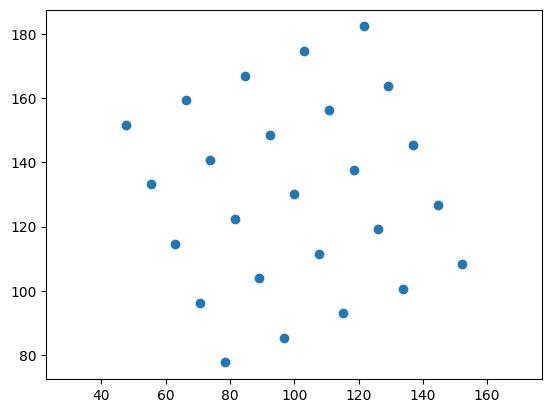

In [31]:
from matplotlib import pyplot as plt
plt.scatter(targets[0,:], targets[1,:])
plt.gca().axis('equal')

In [23]:
client.load_and_project('C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240216_1558561x3Andor20_quad2_with_feedback')

20240219_163111
20240219_163111


(['ok'], ['ok'])

In [130]:
client.send_get_fourier_calibration()

20240220_165358


['C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_0216_calibration_bishop_flipper_00000.h5']

In [ ]:
C:\\msys64\\home\\nilab\\projects\\NaCsSLM\\lib\\Na_pattern\\20240426_1714154x1_horizontal_test